Black-Scholes equation:
$$\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2}+rS\frac{\partial V}{\partial S}-rV=0$$
where
- $t$ is a time in years
- $r$ is the annualized risk-free interest rate, continuously compunded, i.e., the force of interest
- $S(t)$ is the price of the underlying asset at time $t$
- $\sigma$ is the standard deviation of the stock's returns
- $V$ is the price of the option

Boundary conditions:
$$\begin{align*}
C(0,t) &= 0 \text{ for all } t\\
C(S,t) &\to S-K \text{ as } S\to\infty\\
C(S,T) &= \max\{S-K,0\}
\end{align*}$$
where
- $C$ is the price of a European call option
- $T$ is the time of option expiration
- $\tau=T-t$ is the time until maturity
- $K$ is the strike price of the option

Solution:
$$\begin{align*}
C(F,\tau) &= D[N(d_+)F - N(d_-)K]\\
d_+ &= \frac{1}{\sigma\sqrt{\tau}}\left[\ln\left(\frac{F}{K}\right)+\frac{1}{2}\sigma^2\tau\right]\\
d_- &= d_+ - \sigma\sqrt{\tau}
\end{align*}$$
where
- $N(x)$ is the standard normal CDF
- $D=\exp(-r\tau)$ is the discount factor
- $F=\exp(r\tau)S=S/D$ is the forward price of the underlying asset

Given put-call parity, $C-P = D(F-K) = S-DK$, the price of a European put option $P$ is
$$P(P(F,\tau)) = D[N(-d_-)K - N(-d_+)F]$$

In [8]:
import numpy as np
from scipy.special import ndtr
import matplotlib.pyplot as plt

In [3]:
def call_price(
    t, r,
    S, sigma,
    T, K,
):
    tau = T - t
    D = np.exp(-r * tau)
    F = S / D
    d_plus = (np.log(F / K) + 0.5 * sigma**2 * tau) / sigma * np.sqrt(tau)
    d_minus = d_plus - sigma * np.sqrt(tau)
    C = D * (ndtr(d_plus) * F - ndtr(d_minus) * K)
    return C

In [31]:
asset_prices = np.linspace(0.5, 1.5, 200)
times = np.linspace(0., 2., 200)

In [32]:
call_prices = np.empty((asset_prices.size, times.size))
for i in range(asset_prices.size):
    for j in range(times.size):
        call_prices[i,j] = call_price(
            t=times[j], r=0.04,
            S=asset_prices[i], sigma=0.2,
            T=2., K=1.,
        )
call_prices.shape

(200, 200)

In [61]:
from scipy.optimize import root_scalar

In [73]:
def asset_price_for_0C(t):
    def f(S, t):
        return call_price(
            t=t, r=0.04,
            S=S, sigma=0.2,
            T=2., K=1.,
        )
    res = root_scalar(f, args=t, x0=1.)
    return res.root

In [79]:
asset_prices_for_0C = np.empty_like(times)
for i in range(times.size):
    asset_prices_for_0C[i] = asset_price_for_0C(times[i])

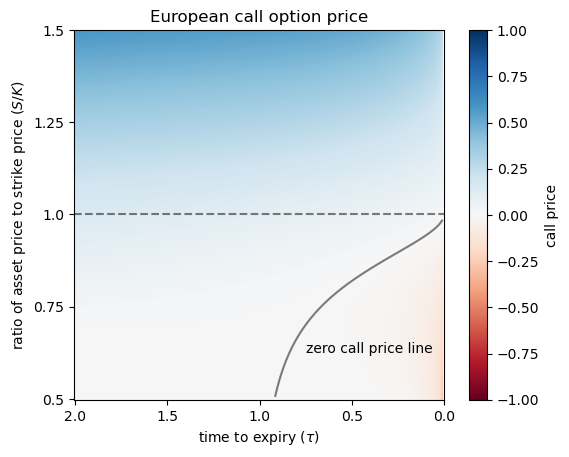

In [106]:
plt.imshow(call_prices, cmap='RdBu', vmin=-1, vmax=1, origin='lower')
plt.axhline(100, c='k', ls='--', alpha=0.5)
# plt.text(2, 103, 'strike price')
x = 100*times[:-1]
y = 200*(asset_prices_for_0C-0.5)[:-1]
plt.plot(x[y>0], y[y>0], c='k', alpha=0.5)
plt.text(125, 25, 'zero call price line')
plt.xticks(ticks=np.arange(0, 200+50, 50), labels=np.arange(2, 0-0.5, -0.5))
plt.yticks(ticks=np.arange(0, 200+50, 50), labels=np.arange(0.5, 1.5+0.25, 0.25))
plt.xlabel('time to expiry '+r'$(\tau)$')
plt.ylabel('ratio of asset price to strike price '+r'$(S/K)$')
plt.colorbar(label='call price')
plt.title('European call option price');